<a href="https://colab.research.google.com/github/Garvit-Kr/Deep_L/blob/main/Convolution_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#convolution = siginal and image propessing
#              feature extracting and pattren matching
#              basically a mathematical ops.
#              also has bias per kernel
# Kernels = they are filters that extracts features from image
#           different image has diff feature maps
#           N kernel produces N layer result.called channels(features)
#           odd size kernel & small(exact centre)(ussually)
# Feature Maps as Channels(channels * height * width)

In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

# NEW!
import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset,DataLoader

# convolution
from scipy.signal import convolve2d

# to read an image from a url
from imageio import imread

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

MAUNUAL PROCESS of 2D CONVOLUTION

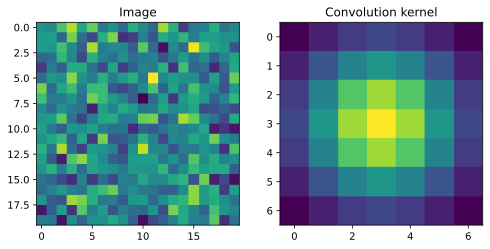

In [ ]:
# image
imgN = 20
image = np.random.randn(imgN,imgN)

# convolution kernel
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp( -(X**2+Y**2)/7 )


# let's see what they look like
fig,ax = plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()

In [ ]:
### MANUAL PROCESS

# now for the convolution
convoutput = np.zeros((imgN,imgN))
halfKr = kernelN//2

for rowi in range(halfKr,imgN-halfKr):
  for coli in range(halfKr,imgN-halfKr):

    # cut out a piece of the image
    pieceOfImg = image[rowi-halfKr:rowi+halfKr+1,:]      # get the rows
    pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1] # extract the columns

    # dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
    dotprod = np.sum( pieceOfImg*kernel[::-1,::-1] )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod

In [ ]:
### AUTO PROCESS

# using scipy
convoutput2 = convolve2d(image,kernel,mode='valid')

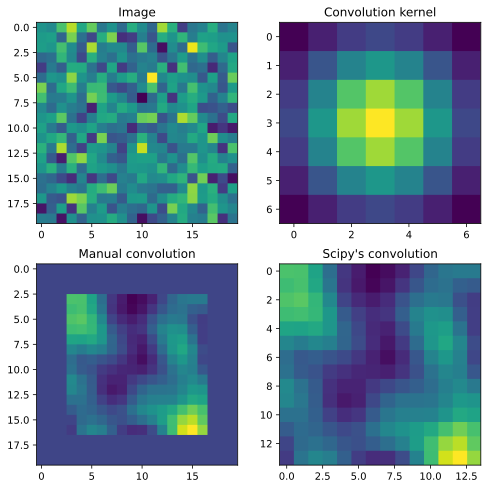

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

plt.show()

EXAMPLE OF PREV.

/tmp/ipython-input-6-431244190.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')


(1675, 3000, 3)
(1675, 3000)


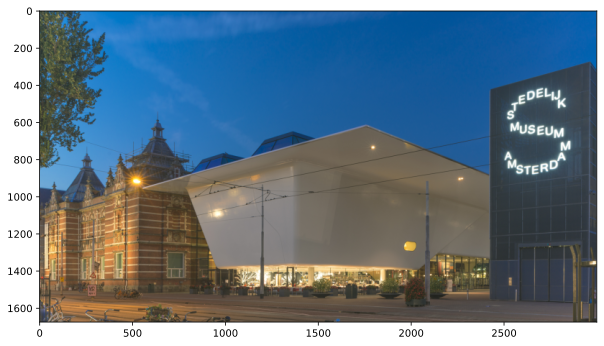

In [ ]:
# read a pic from the web
bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# check the size
print(bathtub.shape)

# let's see what the famous Bathtub Museum looks like
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub);

# transform image to 2D for convenience (not necessary for convolution!)
bathtub = np.mean(bathtub,axis=2)
bathtub = bathtub/np.max(bathtub)

# check the size again
print(bathtub.shape)

In [ ]:
# hand-craft two convolution kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

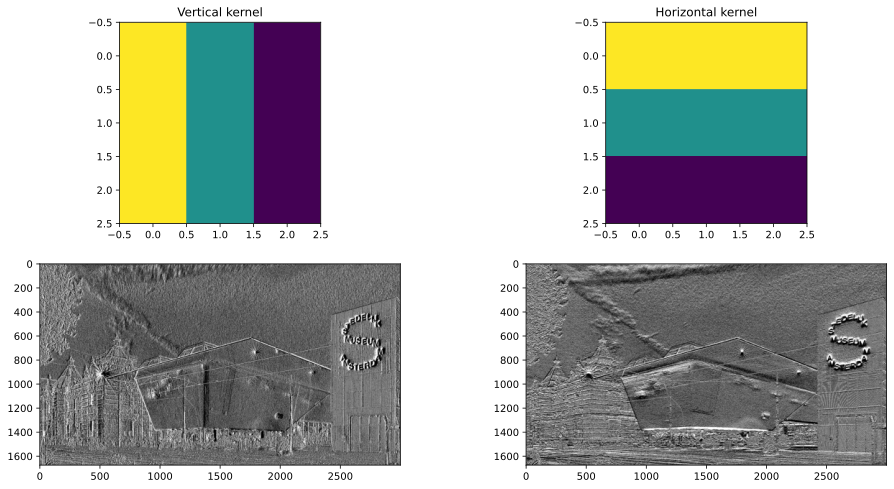

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = convolve2d(bathtub,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres = convolve2d(bathtub,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)

plt.show()

In [ ]:
### WITH PyTorch

# first, translate everything into a tensor
import torch
import torch.nn.functional as F

VK_t = torch.tensor(VK).view(1,1,3,3).double()
HK_t = torch.tensor(HK).view(1,1,3,3).double()
bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])

print(VK_t.shape)
print(bathtub_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1675, 3000])


In [ ]:
C = F.conv2d(bathtub_t,VK_t)
print(C.shape)

torch.Size([1, 1, 1673, 2998])


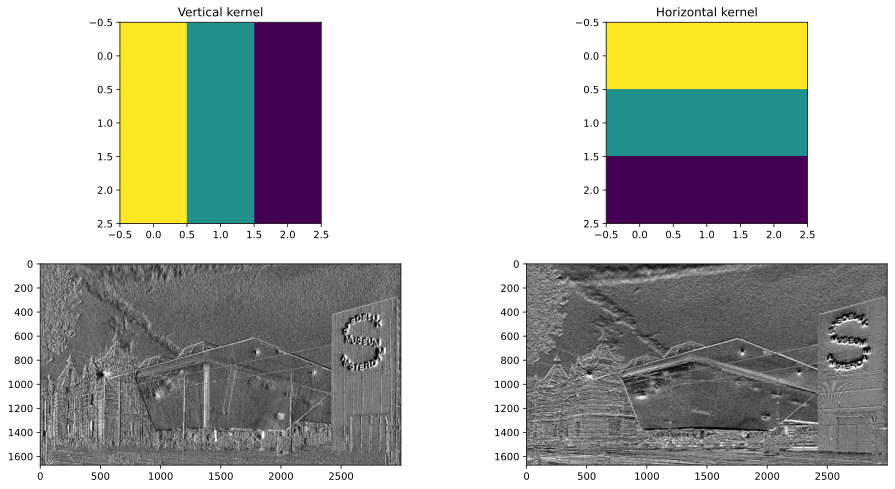

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = F.conv2d(bathtub_t,VK_t)
img = torch.squeeze(convres.detach())
ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convres = F.conv2d(bathtub_t,HK_t)
img = torch.squeeze(convres.detach())
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()

In [ ]:
### PADDING

# Padding is used to increase the size of the result of
# convolution, and match with the previous layer(oo image).

# Padding involves inserting 1+ rows and columns.

# Added rows/columns are symmetric!

# Padded numbers are usually zeros. It's also possible to
# wrap the image from top-to-bottom (circular convolution).



### STRIDE

# Stride is used to decrease the size of the result of
# convolution. It is a mechanism of downsampling, and
# reduces the number of parameters in a CNN.

# The stride parameter (should have been called skip IMHO
# is an integer. Stride=1 gives the full result.

# Stride is usually the same for rows and columns, but can
# be different when warranted.


### FORMULA

# Nh = |(Mh + 2p - k) / sh| +1   (| = something called floor for round off)

# (Nh = no. of pixel in current image)
# (Mh = no. of layer in prev. layer)
# (p = padding)
# (k = no. of pixel in kernel(height))
# (sh = stride)

CONVO_2 in TORCH

In [ ]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


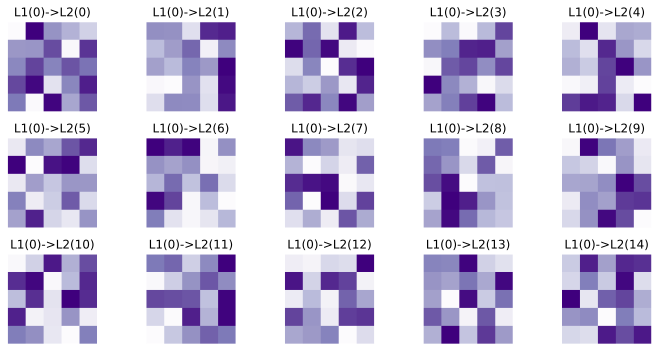

In [ ]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


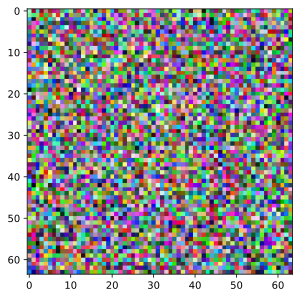

In [ ]:
## convolve with image

# size of the image (N, RGB, height, width)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [ ]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


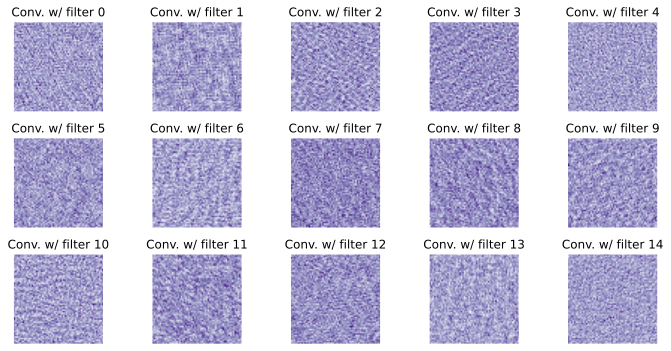

In [ ]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

TRANSPOSE CONVOLUTION

In [ ]:
# Transpose convolution means to scalar-multiply a kernel
# by each pixel in an image.

# As long as the kernel is >1 pixel, the result will be higher
# resolution than the original image.

# Transpose convolution is used for autoencoders and
# super-resolution CNNs.

# Transpose convolution takes the same parameters as
# "forward" convolution: kernel size, padding, stride.



#FORMULA-- Nh = Sh( Mh - 1 ) + k - 2p

# (Nh = no. of pixel in current image)
# (Mh = no. of layer in prev. layer)
# (p = padding)
# (k = no. of pixel in kernel(height))
# (sh = stride)

In [ ]:
# create a ConvTranspose2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance
c = nn.ConvTranspose2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

# tip: Compare the sizes of these weights with those of "forward" convolution (DUDL_convolution_conv2.ipynb)

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


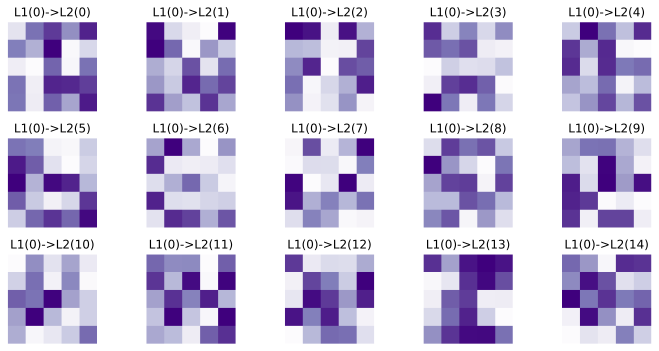

In [ ]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[0,i,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


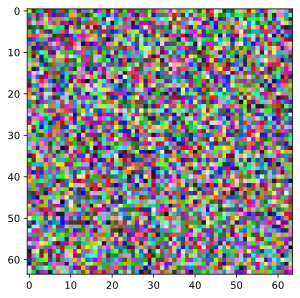

In [ ]:
# size of the image (N, RGB, width, height)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [ ]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


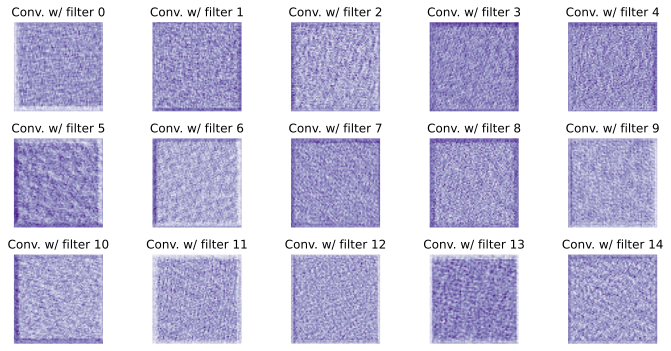

In [ ]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

POOLING

In [ ]:
### POOLING

# reduces the size of spatial image with each successive network
# allows the model to detect one feature anywhere in the image

' WHY ??'
# Reduces dimensionality (fewer parameters).

# Selects for features over a broader spatial area
# (increased "receptive field" size)

# Deeper into the model, we want more channels
# with fewer pixels. This makes the representations
# increasingly abstract.

In [ ]:
# Max pooling: Highlights sharp features.Useful for sparse data and increasing contrast.

# Mean pooling: Smooths images (it's a low-pass filter).Useful for noisy data and to reduce the impact of outliers on learning.

In [ ]:
'RECEPTIVE FIELDS'

# ANNs have a one-to-one mapping
# between pixel and unit. In other
# words, the receptive field of an ANN
# unit is one pixel.

# This makes the model non-robust to
# translations, resizing, rotations, etc.

# We want a model that can "see" the
# features anywhere in the image.

In [ ]:
'What about deep ANNs?'

# Sufficiently deep ANNs willalso work "just as well"
# (because of the universal approximation theorem).

# But they will be much more complex, have many
# more parameters, and will be much harder to train.

# CNNs are a more efficient architecture for certain
# kinds of problems, namely image categorization.

In [ ]:
### parameters

# Spatial Extent(kernel size):no. of pixel in window
# Stride :

# usually same value or kernel > stride

In [ ]:
# create a pool class instance with parameters

# parameters
poolSize = 3
stride   = 3

# create the instance
p2 = nn.MaxPool2d(poolSize,stride=3)
p3 = nn.MaxPool3d(poolSize,stride=3)

# let's have a look at them
print(p2)
print(p3)

MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)


In [ ]:
# Create image and apply maxpooling

# create a 2D and a 3D image
img2 = torch.randn(1,1,30,30)
img3 = torch.randn(1,3,30,30)


# all combinations of image and maxpool dimensionality
img2Pool2 = p2(img2)
print(f'2D image, 2D maxpool: {img2Pool2.shape}\n' )

# img2Pool3 = p3(img2)
# print(f'2D image, 3D maxpool: {img2Pool3.shape}\n' )

img3Pool2 = p2(img3)
print(f'3D image, 2D maxpool: {img3Pool2.shape}\n' )

img3Pool3 = p3(img3)
print(f'3D image, 3D maxpool: {img3Pool3.shape}\n' )


2D image, 2D maxpool: torch.Size([1, 1, 10, 10])

3D image, 2D maxpool: torch.Size([1, 3, 10, 10])

3D image, 3D maxpool: torch.Size([1, 1, 10, 10])



In [ ]:
littlenet = nn.Sequential(

    ## the conv-pool block
    nn.Conv2d(3,10,5,3,2), # convolution layer
    nn.ReLU(),             # activation function
    nn.AvgPool3d(3,3),     # average-pool

    ## the FFN block
    nn.Flatten(),          # vectorize to get from image to linear
    nn.Linear(588,1),      # FC linear layer
    nn.Sigmoid()           # output activation
  )


In [ ]:
# test with a bit of data
img = torch.rand(1,3,128,128)
littlenet(img)

tensor([[0.5075]], grad_fn=<SigmoidBackward0>)

In [ ]:
'Pooling vs Stride'

# *  fast  \\//  slow
# *  no parmeter  \\//  learned parameter
# *  kernel span smaller area  \\//  kernel span larger area
#    (smaller receptive field)       (larger receptive field)
# *  highly stable  \\// can be unstable in complex arcitecture

IMAGE TRANSFORM

In [ ]:
# 2 reason

#Pre-trained CNNs are coded for certain image sizes.
# You might need to resize your images to work, or
# convert to grayscale.

# Transforming images changes raw pixel values without
# changing the image information. Transforms are thus
# way to increase the total amount of data.

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [ ]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

100%|██████████| 170M/170M [00:03<00:00, 43.6MB/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories
print( cdata.classes )

# .targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


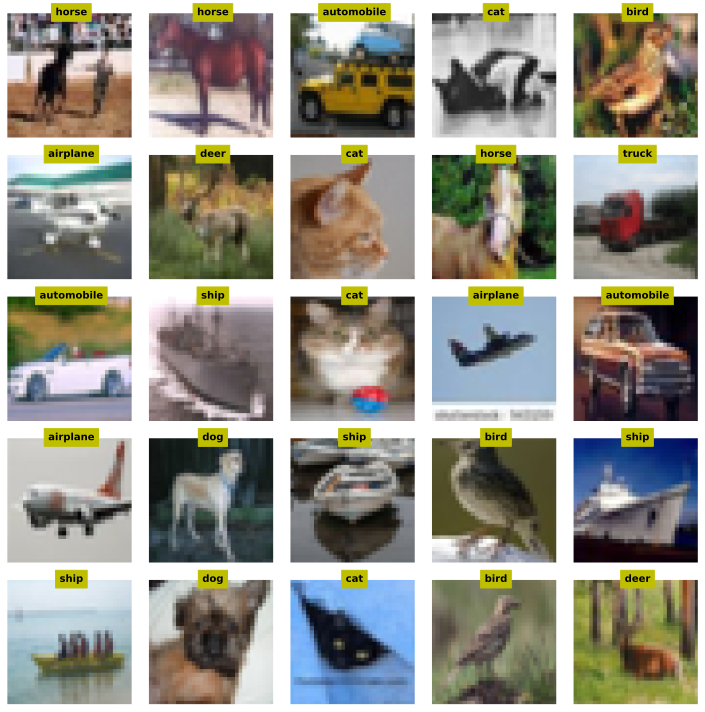

In [ ]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4),
                 T.Grayscale(num_output_channels=1)  ])

# include the transform in the dataset
cdata.transform = Ts

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)


# Important! Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


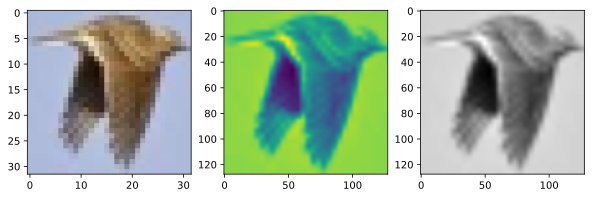

In [ ]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

In [ ]:
# Note about ToTensor() and normalization:
??T.ToTensor()

Object `T.ToTensor()` not found.


Custom Data Set

In [ ]:
'Order of operations when applying transformation'

# 1) Import the data.
# 2) Create a custom DataSet class.
# 3) Define the transformations.
# 4) Create a DataSet with your data and transformation.
# 5) Create a DataLoader (same as usual)

In [ ]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# extract only the first 8
labels = data[:8,0]
data   = data[:8,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# reshape to 2D!
dataNorm = dataNorm.reshape(dataNorm.shape[0],1,28,28)

# check sizes
print(dataNorm.shape)
print(labels.shape)

# convert to torch tensor format
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

(8, 1, 28, 28)
(8,)


In [ ]:
# My custom dataset class is modeled after the official class
??torch.utils.data.TensorDataset

In [ ]:
class customDataset(Dataset):
  def __init__(self, tensors, transform=None):

    # check that sizes of data and labels match
    assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"

    # assign inputs
    self.tensors   = tensors
    self.transform = transform

  # what to do when someone wants and item from the dataset
  def __getitem__(self, index):

    # return transformed version of x if there are transforms
    if self.transform:
      x = self.transform(self.tensors[0][index])
    else:
      x = self.tensors[0][index]

    # and return label
    y = self.tensors[1][index]

    return x,y # return the (data,label) tuple

  def __len__(self):
    return self.tensors[0].size(0)

In [ ]:
# Note: several transforms work only on PIL-format data, so it's common to transform
#       to PIL, apply transformations, then transform back to tensor.

# create a list of transforms to apply to the image
imgtrans = T.Compose([
                      T.ToPILImage(),
                      T.RandomVerticalFlip(p=.5),
                      # T.RandomRotation(90),
                      T.ToTensor()
                       ])

In [ ]:
# now convert the data into datasets and then dataloaders

# convert into PyTorch Datasets
# NOTE: we have no test data here, but you should apply the same transformations to the test data
train_data = customDataset((dataT,labelsT),imgtrans)

# translate into dataloader objects
dataLoaded = DataLoader(train_data,batch_size=8,shuffle=False)

In [ ]:
type(train_data)

__main__.customDataset

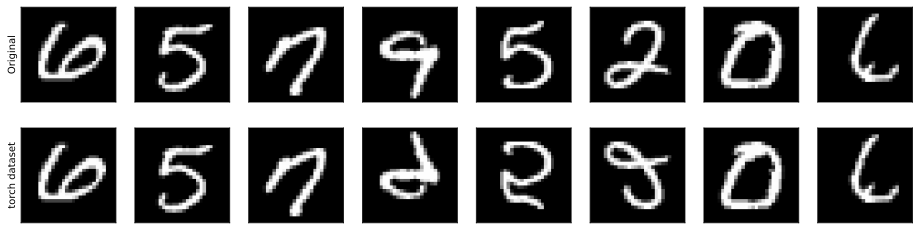

In [ ]:
# import data from the dataloader, just like during training
X,y = next(iter(dataLoaded))


# create a figure
fig,axs = plt.subplots(2,8,figsize=(16,4))


# loop over images in the dataset
for i in range(8):

  # draw images
  axs[0,i].imshow(dataT[i,0,:,:].detach(),cmap='gray')
  axs[1,i].imshow(X[i,0,:,:].detach(),cmap='gray')

  # some niceties
  for row in range(2):
    axs[row,i].set_xticks([])
    axs[row,i].set_yticks([])

# row labels
axs[0,0].set_ylabel('Original')
axs[1,0].set_ylabel('torch dataset')

plt.show()

In [ ]:
# Important to know: we haven't actually increased the amount of data
len(train_data)

8